In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set_style('darkgrid')


In [28]:
# Define the directory containing images for each alphabet
base_directory = 'D:\\dyslexia D\\'

In [29]:
alphabets = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")

In [30]:
# Collect paths and labels for images of all alphabets
rows = []

for alphabet in alphabets:
    alphabet_directory = os.path.join(base_directory, alphabet)
    if os.path.exists(alphabet_directory):
        for filename in os.listdir(alphabet_directory):
            file_path = os.path.join(alphabet_directory, filename)
            if filename.endswith('.jpg') or filename.endswith('.png'):
                rows.append([file_path, alphabet])

In [31]:
# Create DataFrame from collected data
data = pd.DataFrame(rows, columns=['path', 'label'])
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,path,label
0,D:\dyslexia D\J\J-47.png,J
1,D:\dyslexia D\V\V-207.png,V
2,D:\dyslexia D\M\M-455.png,M
3,D:\dyslexia D\A\A-2467.png,A
4,D:\dyslexia D\O\O-458.png,O
5,D:\dyslexia D\O\O-275.png,O
6,D:\dyslexia D\W\W-348.png,W
7,D:\dyslexia D\V\V-98.png,V
8,D:\dyslexia D\T\T-458.png,T
9,D:\dyslexia D\A\A-1785.png,A


In [32]:
# Visualize distribution of classes
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])
# Bar plot
fig.add_trace(go.Bar(x=data['label'].value_counts().index, y=data['label'].value_counts().to_numpy(),
                     marker_color=sns.color_palette('pastel'), showlegend=False),
              row=1, col=1)

# Pie chart
fig.add_trace(go.Pie(values=data['label'].value_counts().to_numpy(), labels=data['label'].value_counts().index,
                     marker=dict(colors=sns.color_palette('pastel'))),
              row=1, col=2)

fig.update_layout(title_text='Images Distribution by Alphabet')
fig.show()

In [33]:
# Set up ImageDataGenerator
generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=2,
    zoom_range=0.2,
    rescale=1/255,
    validation_split=0.2,
)

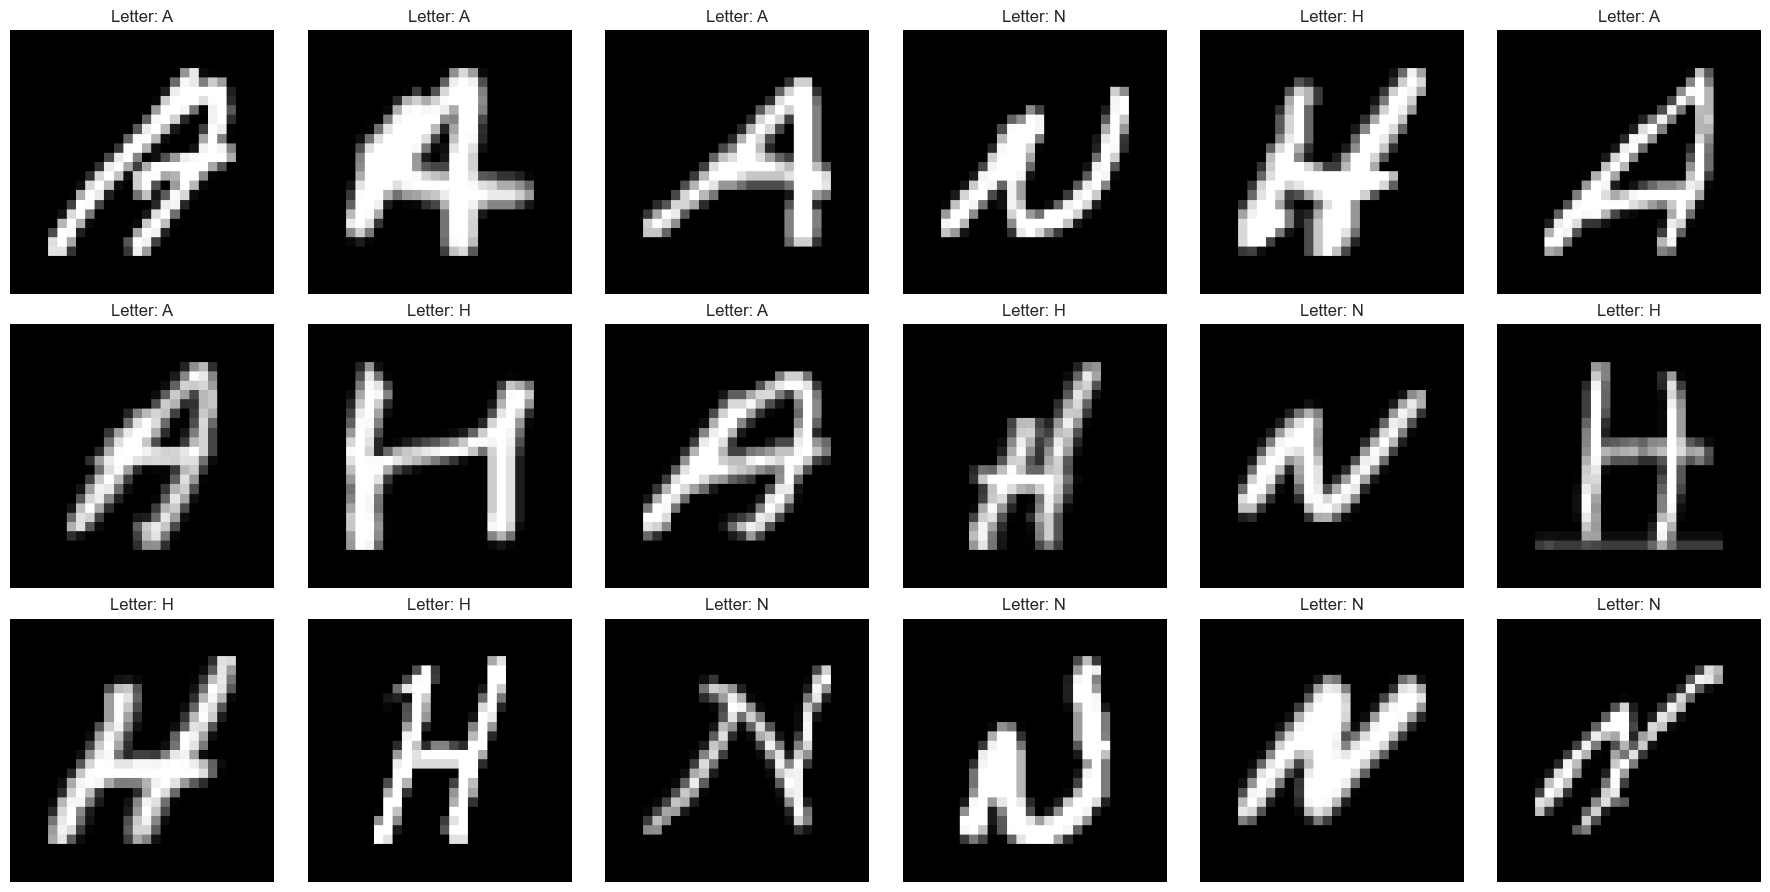

In [38]:
letters_to_print = ['A', 'N', 'H']
images_to_print = data[data['label'].isin(letters_to_print)].groupby('label').head(6)

# Print images
fig, axes = plt.subplots(3, 6, figsize=(18, 9))

for ax, (_, row) in zip(axes.flatten(), images_to_print.iterrows()):
    img_path = row['path']
    img = image.load_img(img_path, target_size=(256, 256))
    ax.imshow(img)
    ax.set_title("Letter: " + row['label'])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # 26 classes for 26 alphabets
])

# Print model summary
print("\nModel Summary:")
model.summary()


Model Summary:


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,467,802 (28.49 MB)

 Trainable params: 7,467,802 (28.49 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Specify class_mode as 'categorical'
train_gen = generator.flow_from_dataframe(data, x_col='path', y_col='label', target_size=(256, 256),
                                          class_mode='categorical', subset='training')
val_gen = generator.flow_from_dataframe(data, x_col='path', y_col='label', target_size=(256, 256),
                                        class_mode='categorical', subset='validation')

Found 11629 validated image filenames belonging to 26 classes.
Found 2907 validated image filenames belonging to 26 classes.


In [40]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # 26 classes for 26 alphabets
])

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_gen, epochs=10, validation_data=val_gen)


Epoch 1/10


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



364/364 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - accuracy: 0.3538 - loss: 2.3278 - val_accuracy: 0.7417 - val_loss: 0.8857
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 548s 1s/step - accuracy: 0.7617 - loss: 0.7828 - val_accuracy: 0.8325 - val_loss: 0.5582
Epoch 3/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 551s 2s/step - accuracy: 0.8339 - loss: 0.5404 - val_accuracy: 0.8510 - val_loss: 0.5068
Epoch 4/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 551s 2s/step - accuracy: 0.8651 - loss: 0.4465 - val_accuracy: 0.8665 - val_loss: 0.4273
Epoch 5/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - accuracy: 0.8889 - loss: 0.3814 - val_accuracy: 0.8910 - val_loss: 0.3748
Epoch 6/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 536s 1s/step - accuracy: 0.8914 - loss: 0.3508 - val_accuracy: 0.8817 - val_loss: 0.4078
Epoch 7/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 3563s 10s/step - accuracy: 0.9010 - loss: 0.3247 - val_accuracy: 0.9102 - val_loss: 0.3228
Epoch 8/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 527s 1s/step - accuracy: 0.9140 - loss: 0.2879 - val_accuracy: 0.9

In [15]:
# Evaluate the model on validation data
evaluation = model.evaluate(val_gen)
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])

91/91 ━━━━━━━━━━━━━━━━━━━━ 40s 439ms/step - accuracy: 0.9003 - loss: 0.3235
Evaluation Loss: 0.32966384291648865
Evaluation Accuracy: 0.9036807417869568


In [ ]:
img_path = 'W\\W-60.png'  # Example image path
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img) / 255.
img_array = tf.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)
predicted_class = alphabets[np.argmax(prediction)]
print("Predicted class:", predicted_class)

: 